In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import preprocessing

In [178]:
df=pd.read_csv('online_shoppers.csv')

In [179]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [180]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [181]:
df = df[df.VisitorType != 'Other']

In [182]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Name: VisitorType, dtype: int64

In [183]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [184]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000
mean,2.321029,80.944413,0.505839,34.630576,31.865169,1199.080153,0.022078,0.042932,5.803858,0.061854,2.098326,2.311719,3.121437,4.002858
std,3.326056,176.579347,1.272970,141.137281,44.548083,1916.732843,0.048201,0.048378,18.075511,0.199540,0.825893,1.574388,2.375767,3.898928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.250000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.583333,0.003175,0.025137,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.600000,0.000000,0.000000,38.000000,1472.000000,0.016923,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [185]:
def get_cleaned(df):
    return df[(df.Administrative <10) & (df.Administrative<150) & (df.ProductRelated<120)]


In [186]:
df=get_cleaned(df)

## Exploratory Data Analysis

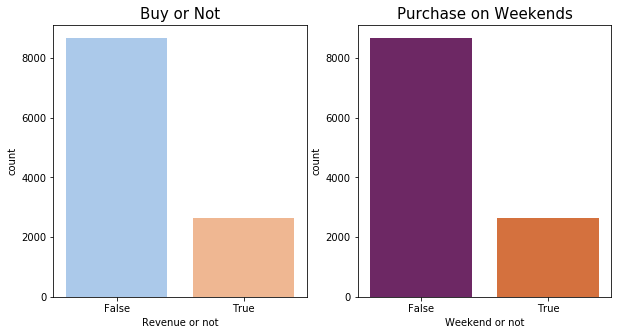

In [187]:
# checking the Distribution of customers on Revenue

#plt.rcParams['figure.figsize'] = (18, 7)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 10)
plt.ylabel('count', fontsize = 10)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 10)
plt.ylabel('count', fontsize = 10)

plt.show()

Text(0, 0.5, 'count')

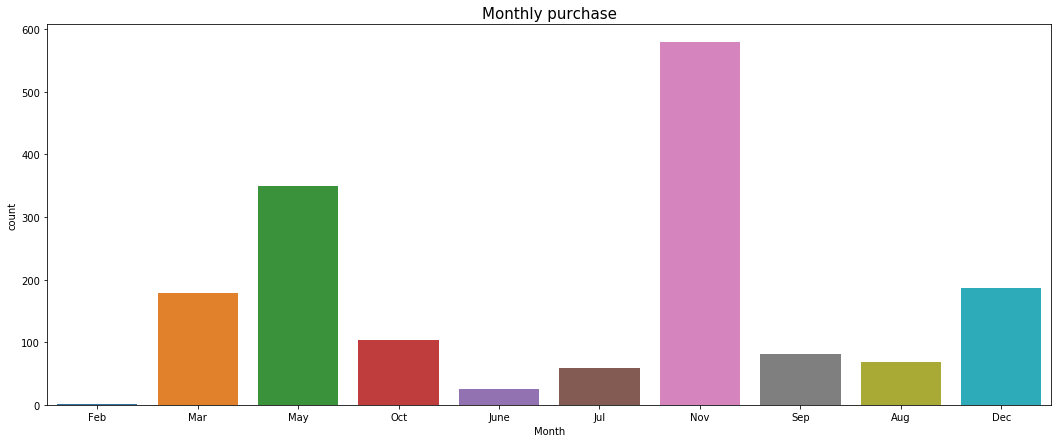

In [188]:
df2=df[df['Revenue']==True]
sns.countplot(df2['Month'])
plt.title('Monthly purchase', fontsize = 15)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('count', fontsize = 10)

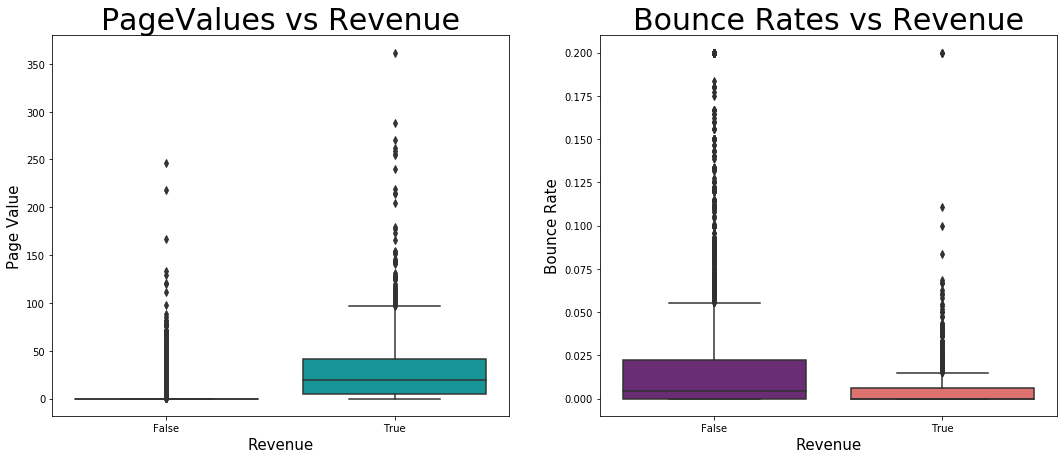

In [189]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.boxplot(x='Revenue',y='PageValues',data=df,palette='winter')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Page Value', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.boxplot(x='Revenue',y='BounceRates',data=df,palette='magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Bounce Rate', fontsize = 15)

plt.show()

Text(0, 0.5, 'ProductRelated_Duration')

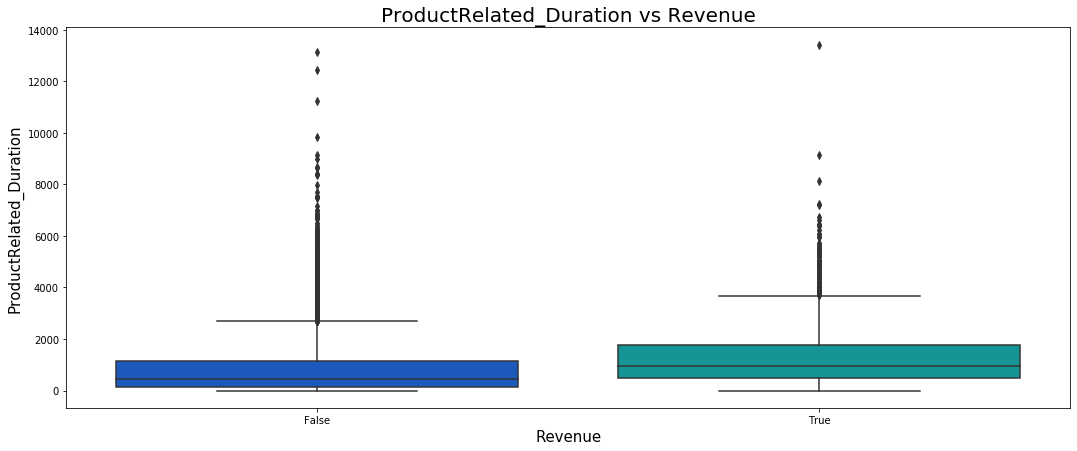

In [190]:
sns.boxplot(x='Revenue',y='ProductRelated_Duration',data=df,palette='winter')
plt.title('ProductRelated_Duration vs Revenue', fontsize =20 )
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('ProductRelated_Duration', fontsize = 15)

In [191]:
df2=df[df['Revenue']==True]
df2=df.groupby('TrafficType').sum()

In [192]:
df2.reset_index(level=0, inplace=True)

In [193]:
df2.head()

,TrafficType,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,Weekend,Revenue
0,1,3034,111078.389120,632,37954.030833,53124,2.134889e+06,76.826830,131.592792,7430.236448,95.8,4823,5696,7296,475.0,221.0
1,2,7822,291098.765940,2001,143969.621627,94648,3.648882e+06,31.006622,96.022497,29181.370832,130.0,7051,7693,11108,912.0,711.0
2,3,2638,75898.403457,426,27190.154359,39334,1.372721e+06,67.296845,114.319651,5838.453977,184.0,3956,4320,5772,343.0,156.0
3,4,1945,62665.622513,443,26688.327143,24953,8.792015e+05,17.096285,37.789451,6889.617059,129.4,2099,2312,3221,281.0,155.0
4,5,699,22188.216826,94,3775.416667,3697,1.450165e+05,2.356983,7.377098,1890.575749,11.6,483,587,668,55.0,54.0


In [194]:
df['VisitorType'].value_counts()

Returning_Visitor    9669
New_Visitor          1655
Name: VisitorType, dtype: int64

In [195]:
df['OperatingSystems'].value_counts()

2    5994
1    2446
3    2387
4     441
8      25
6      19
7       6
5       6
Name: OperatingSystems, dtype: int64

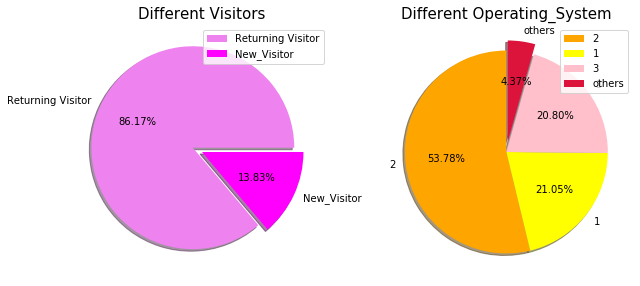

In [196]:

plt.figure(figsize=(10,10))
size = [10551, 1694]
colors = ['violet', 'magenta',]
labels = "Returning Visitor", "New_Visitor"
explode = [0.1,0]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 15)
plt.axis('off')
plt.legend()

size = [6585,2578,2547,535]
colors = ['orange', 'yellow', 'pink', 'crimson']
labels = '2', '1','3','others'
explode = [0,0,0,0.1]

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels,explode=explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Operating_System', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

Text(0.5, 1, 'Heatmap of correlation between each variables')

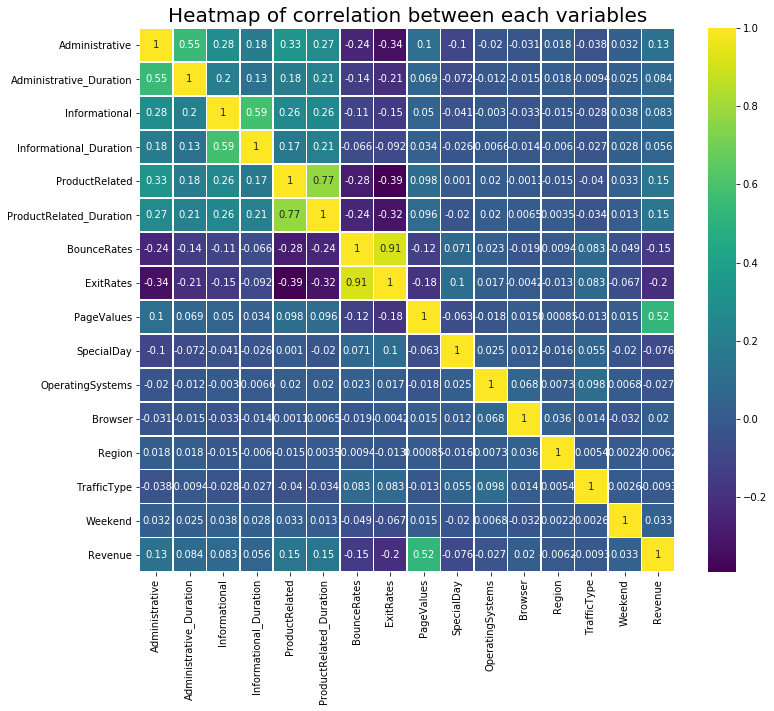

In [197]:
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),linewidth=0.5,annot=True,cmap='viridis')
plt.title('Heatmap of correlation between each variables',fontsize=20)

In [198]:
df['Revenue'].value_counts()

False    9692
True     1632
Name: Revenue, dtype: int64

In [229]:
le = preprocessing.LabelEncoder()
df['Month'] = le.fit_transform(df.Month.values)
df['VisitorType'] = le.fit_transform(df.VisitorType.values)
df['Weekend'] = le.fit_transform(df.Weekend.values)
df['Revenue'] = le.fit_transform(df.Revenue.values)

In [230]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [231]:

columns = df.columns.tolist()

columns = [c for c in columns if c not in ['Revenue']]
 
target = 'Revenue'
X = df[columns]
y = df[target]

print(X.shape)
print(y.shape)

(11324, 17)
(11324,)


In [232]:
!pip install imblearn

In [233]:

from imblearn.over_sampling import RandomOverSampler

In [234]:

os =  RandomOverSampler()

In [235]:
X_res, y_res = os.fit_sample(X, y)

In [236]:

X_res.shape,y_res.shape

((19384, 17), (19384,))

In [237]:

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 9692, 1: 1632})
Resampled dataset shape Counter({False: 9692, True: 9692})


In [253]:
class LogisticRegression:
    
    def __init__(self,learningRate, tolerance, maxIteration=5000,index=[],drop=False):
    
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.index=index
        self.drop=drop
        
    
    def splitTraintest(self,X,y):
        X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
        
        X_train,X_test=np.array(X_train,dtype=np.float64), np.array(X_test,dtype=np.float64)
        
        y_train,y_test=np.array(y_train,dtype=np.float64), np.array(y_test,dtype=np.float64)
        
        
        return X_train,X_test,y_train,y_test
        
    
    #Function to remove outliers when an index is given
    def remove_index(self,X_train,y_train,index):
        X_train=np.delete(X_train,index,0)
        y_train=np.delete(y_train,index,0)
       
        return X_train,y_train
        
    
    
    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def sigmoid(self,z):
        
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        
        # approach 1
        #pred_=np.log(np.ones(X.shape[0]))+np.exp(X.dot(self.W))-X.dot(self.W).dot(y) # negative log likelihood
        
        #cost=pred_.sum()
        
        #approach 2
        sig=self.sigmoid(X.dot(self.W))
        pred=y*np.log(sig)+(1-y)*np.log(1-sig)
        
        cost=pred.sum()
        
        return cost
    
    def gradient(self,X,y):
        
        sig=self.sigmoid(X.dot(self.W)) 
        grad=(sig-y).dot(X)
        return grad
    
    def gradientDescent(self,X,y):
        
        
        costSequence=[]
        
        last=float('inf')
        
        for t in tqdm(range(self.maxIteration)):
        
            self.W=self.W-self.learningRate*(self.gradient(X,y))
            
            currentCost=self.costFunction(X,y)
            costSequence.append(abs(currentCost))
            
                
            error_difference=last-currentCost
            last_error=currentCost
            
            if error_difference<self.tolerance:
                print("the model stopped learning-Converged at iteration {}".format(t))
                break
        print('costSequence')
        self.plotCost(costSequence)
        
        return
    
    def plotCost(self,costSequence):
        axis=list(range(0,len(costSequence),1))
        #s=np.array(costSequence)
        #t=np.array(s.size)
        fig,ax=plt.subplots()
        ax.plot(axis,costSequence)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost function')
        ax.set_title('Cost trend')
        
        #ax.setlabel(xlabel='iterations',ylabel='Cost',title='cost trend')
        
        ax.grid()
        #plt.legend(bbox_to_anchor=(1.05,1),log=2,shadow=True)
        plt.show()
        
    
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.W).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(10,8))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        plt.title('Decision boundary in Logistic Regression')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.W).reshape(xx.shape)
        fig = plt.figure(figsize=(10,8))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
        
    
    def predict(self, X):
        
        sig=self.sigmoid(X.dot(self.W))
        
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        
        y=(y==1)
        y_hat=(y_hat==1)
        
        accuracy=(y==y_hat).sum()/y.size
        precision=(y&y_hat).sum()/y_hat.sum()
        recall=(y&y_hat).sum()/y.sum()
        
        return accuracy,precision,recall
    
    def runModel(self):
        self.X_train,self.X_test,self.y_train,self.y_test=self.splitTraintest(X_res,y_res)

        
        if self.drop:
            self.X_train,self.y_train=self.remove_index(self.X_train,self.y_train,self.index)
            

        self.W=np.ones(self.X_train.shape[1],dtype=np.float64)*0
        self.gradientDescent(self.X_train,self.y_train)
        
        print('The model parameters are {}'.format(self.W))
        
        y_hat_train=self.predict(self.X_train)
        
        accuracy,precision,recall=self.evaluate(self.y_train,y_hat_train)
        print('Training Accuracy is {}\n Training precision is {}\n Training recall is {}\n'.format(accuracy,precision,recall))
        
        y_hat_test=self.predict(self.X_test)
        
        accuracy,precision,recall=self.evaluate(self.y_test,y_hat_test)
        print('Test Accuracy is {}\n Test precision is {}\n Test recall is {}'.format(accuracy,precision,recall))
        
        self.scatterPlt()
        self.plot3D()
    

In [254]:
regression=LogisticRegression(learningRate=0.000001,tolerance=0.0000001)

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]C:\Users\KEVIN\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
C:\Users\KEVIN\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:48<00:00, 103.56it/s]


costSequence


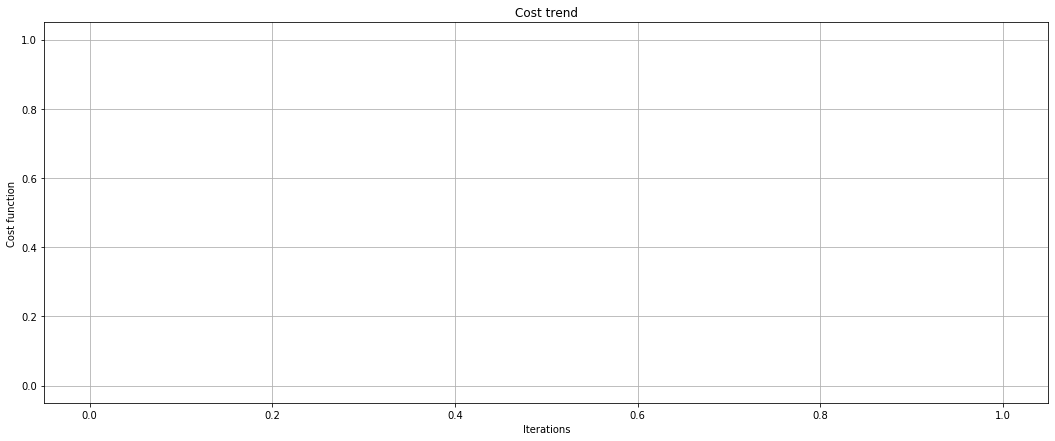

The model parameters are [ -0.34531818  -0.47367233   0.65453524   1.10907967 -25.89128291
   5.32843925  -0.13843605  -0.33856895  81.29896898  -0.987156
 -25.9012068  -14.09629698 -14.77726649 -20.27913916 -23.39903374
  -6.39706438  -1.09367834]
Training Accuracy is 0.5839943251434836
 Training precision is 0.5466323150533677
 Training recall is 0.9621663643430941

Test Accuracy is 0.5922104720144442
 Test precision is 0.557879234167894
 Test recall is 0.9594731509625126


C:\Users\KEVIN\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


ValueError: shapes (62500,2) and (17,) not aligned: 2 (dim 1) != 17 (dim 0)

In [255]:
regression.runModel()